In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read dataset
dataset = pd.read_csv('data/Ads_CTR_Optimisation.csv')

In [3]:
#Implementing UCB algorithm from scratch
import math
users = len(dataset)
ads = 10
ads_selected = []
total_rewards = 0
number_of_selections = [0] * ads
sum_of_rewards = [0] * ads

for user in range(0,users):
    
    max_upper_bound = 0
    ad_upper = 0
    
    for ad in range(0,ads):
        
        if(number_of_selections[ad] > 0):
            average_reward = sum_of_rewards[ad] / number_of_selections[ad]
            delta_i = math.sqrt(3/2 * math.log(user + 1) / number_of_selections[ad])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad_upper = ad
    ads_selected.append(ad_upper)
    number_of_selections[ad_upper] = number_of_selections[ad_upper] + 1
    reward = dataset.values[user,ad_upper]
    sum_of_rewards[ad_upper] = sum_of_rewards[ad_upper] + reward
    total_rewards = total_rewards + reward

In [4]:
print(total_rewards)

2178


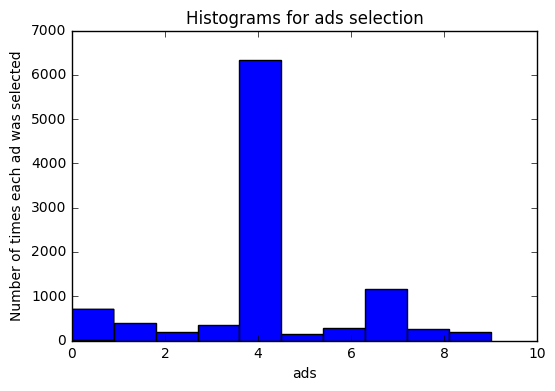

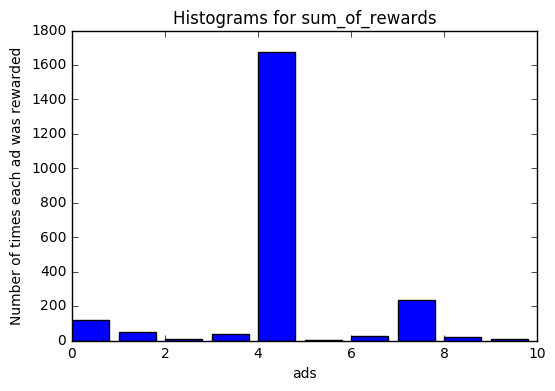

In [5]:
#Visualizing the results
plt.hist(ads_selected)
plt.title('Histograms for ads selection')
plt.xlabel('ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

plt.bar(range(0,10),sum_of_rewards)
plt.title('Histograms for sum_of_rewards')
plt.xlabel('ads')
plt.ylabel('Number of times each ad was rewarded')
plt.show()

**Total_rewards is turned out to be double as compared to random selection method.**